In [1]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
quandl.ApiConfig.api_key = "nkryh3f_sWRHscm8B6kH"
df = quandl.get('WIKI/GOOGL')

In [3]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
df['HL_PCT'] = (df['Adj. High']- df['Adj. Low']) / df['Adj. Low'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

forecast_col = 'Adj. Close'

df.fillna(-99999,inplace = True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

x = np.array(df.drop(['label'],1))
x = preprocessing.scale(x)
x = x[:-forecast_out]
x_lately = x[-forecast_out:]


df.dropna(inplace = True)
y = np.array(df['label'])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

clf = LinearRegression(n_jobs = -1)
clf.fit(x_train,y_train)
accuracy = clf.score(x_test,y_test)
accuracy

0.9785806185811237

In [4]:
forecast_set = clf.predict(x_lately)
forecast_set

array([1076.62928418, 1090.80262919, 1104.48583125, 1099.15875883,
       1092.73267904, 1090.47049958, 1089.02014688, 1085.4289831 ,
       1079.62332142, 1075.22363613, 1073.19453888, 1092.2194477 ,
       1110.66989984, 1115.56983003, 1130.21972648, 1134.40301083,
       1132.60201487, 1130.36059428, 1132.03485066, 1150.08587891,
       1149.53558406, 1158.93314233, 1155.6103452 , 1163.76614742,
       1183.94755326, 1196.60589215, 1190.62364046, 1202.53997664,
       1207.31386241, 1206.75673863, 1197.53784082, 1202.39073285,
       1201.26462519, 1136.75812357, 1082.83033731])

In [6]:
forecast_out

35

In [7]:
from matplotlib import style

In [8]:
style.use('ggplot')

In [9]:
df['Forecast'] = np.nan

In [15]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [14]:
# import datetime
# dt_object = datetime.datetime.fromtimestamp(86400)
# dt_object

datetime.datetime(1970, 1, 2, 3, 0)

In [16]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]


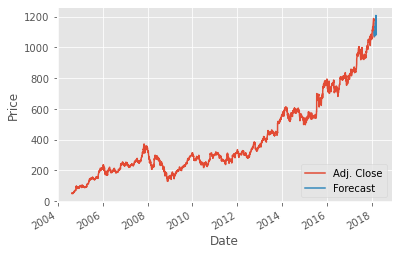

In [18]:
import matplotlib.pyplot as plt
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [19]:
x_lately

array([[ 2.51580102, -0.6039298 ,  0.1412663 , -0.76234496],
       [ 2.57217657, -0.50022447,  0.53002653, -0.57449085],
       [ 2.622965  , -0.44793683,  0.54990695, -0.7682545 ],
       [ 2.60236251, -0.66934251, -0.18213542, -0.7918798 ],
       [ 2.57822928, -0.67105177, -0.43576398, -0.77476995],
       [ 2.56771464, -0.9360309 , -0.26386317, -0.80120658],
       [ 2.55999355, -1.22162213, -0.05415684, -0.84367193],
       [ 2.54831493, -0.82011406, -0.15683226, -0.8371515 ],
       [ 2.52639326, -0.84141529, -0.38203759, -0.82344228],
       [ 2.50990351, -0.7357582 , -0.37741547, -0.82894113],
       [ 2.50000966, -1.13483704, -0.11493011, -0.80783383],
       [ 2.5768713 ,  0.01631025,  1.29052176, -0.75939783],
       [ 2.64791303, -0.03082794,  1.10486504, -0.7600303 ],
       [ 2.66436398, -0.8669119 , -0.06391545, -0.79171453],
       [ 2.72073953, -0.74867757,  0.42847749, -0.76696664],
       [ 2.7359489 , -0.91660483,  0.20859595, -0.808731  ],
       [ 2.73043938, -0.

In [20]:
x

array([[-1.39187095,  4.32619572,  0.23254018,  4.46712802],
       [-1.37635178,  4.39248725,  4.81828847,  1.8207495 ],
       [-1.37423066,  1.3118745 , -0.79917922,  1.26561472],
       ...,
       [ 2.99737935, -0.41972655,  0.33301614, -0.61156746],
       [ 2.7553098 , -0.23757011, -0.46778619, -0.24489949],
       [ 2.55960556,  2.30998825, -1.90605746, -0.49425191]])

In [21]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19 00:00:00,50.322842,8.441017,0.324968,44659000.0,69.078238,NaN
2004-08-20 00:00:00,54.322689,8.537313,7.227007,22834300.0,67.839414,NaN
2004-08-23 00:00:00,54.869377,4.062357,-1.227880,18256100.0,68.912727,NaN
2004-08-24 00:00:00,52.597363,7.753210,-5.726357,15247300.0,70.668146,NaN
2004-08-25 00:00:00,53.164113,3.966115,1.183658,9188600.0,71.219849,NaN
...,...,...,...,...,...,...
2018-03-08 03:00:00,NaN,NaN,NaN,NaN,NaN,1197.537841
2018-03-09 03:00:00,NaN,NaN,NaN,NaN,NaN,1202.390733
2018-03-10 03:00:00,NaN,NaN,NaN,NaN,NaN,1201.264625
